僵尸网络的重要会议：

* ACM协会 - WORM会议
* USENIX协会 - SRUIT会议 - HotBots
* 微软

当前使用的网络架构都是以某个节点为基础，如一台计算机、一个智能手机等，这也是这种网络架构存在的缺点，就拿安全问题来说，现在的很多安全隐患对应的实体都是建立在计算机和网络传输之上的，因网络架构的错综复杂，而又构成病毒等恶意软件都是以软件形式匿名存在的每个节点之上的，这种复杂的网络架构也为病毒肆虐提供了温床，隐蔽性强，而基于种种问题的考量，2010年以NSF发起的未来网络架构研究方案中的NDN（命名数据网络）可以认为是解决这种问题的一个突出，它让数据的封包不再局限于以计算机为首的这种节点，任何终端、电影、书或是指令等都可以成为数据封包，可以想象，如果以这种方式构建网络，任何病毒将无从隐藏，这就从某种程度上掐灭病毒蔓延的火苗。

https://baijiahao.baidu.com/s?id=1595724441862558337&wfr=spider&for=pc

#### 僵尸网络的架构及其特性

传统的集中式的僵尸网络，因其架构的清晰性，一般来说很容易跟踪，但是其命令执行延迟高。为了应对这种架构的易跟踪性，hacker采用了domain flux技术，多个域名动态关联多个ip(域名生成算法)。

p2p僵尸网络的命令传播方式是一传十，十传百这种蔓延的方式。这种架构的僵尸网络，隐藏性好，但是命令执行延迟高。

#### 僵尸网络的实施步骤

僵尸网络的第一步就是扫描阶段，这步的防御工作最重要

第二步是漏洞利用阶段，如sql注入，命令执行，密码爆破等

第三步是感染阶段，漏洞利用成功，留后门，内网扫描，潜伏

第四步是注册到C&C服务，botmaster利用C&C向各个感染的bots发送指令

第五步是资源利用，那恭喜你到这一步，你的机器可能已经是肉机了！发送垃圾邮件，那你所在公司的出站的IP一般会被拉黑，你的数据中心如果有肉机发起DDOS，那你的数据中心可能就会被其它公司封禁

第六步是扩散阶段，到这个时候你的机器那就是帮凶了

网络防火墙，NIDS，WAF，蜜罐，日志分析，杀毒软件，HIDS，主机防火墙等

僵尸网络检测的信息来源：蜜罐或蜜网、网络流量数据、日志以及流数据。

僵尸网络扫描程序在IP分布、自治系统分布、操作系统属性、本地扫描速率等方面都有一定的特征。随机IP随机时间扫描，很具有迷惑性。

僵尸程序发作时表现出的3个不变特征：1. 将是程序的启动是自动的，不需要任何用户操作；2. 僵尸程序必须和攻击者建立命令与控制信道；3. 僵尸程序迟早会执行本地或远程的攻击。

#### 僵尸网络的检测方法

* 终端检测
    * 利用蜜罐、蜜网捕获恶意代码
    * 在单个主机层判定僵尸程序
    * 需要解决恶意代码样本获取和可控环境安全
    * 需要尽量多的部署蜜罐，蜜罐资源有限，只能收集少量攻击连接数据集
    * 搭建环境困难，僵尸程序检测会消耗大量的主机资源
* 网络流量特征分析
    * 利用僵尸程序与C&C之间通讯的空间相似性，区别于正常用户的通讯模式
    * 对相似的流、相同攻击流进行聚类分析，如BotHunter，BotSniffer和BotMiner
    * 纯网络层报头信息，不需要进行深度包检测的BotFinder
    * 提取僵尸网络产生的数据流量特征，基于统计学和机器学习方法针对不同僵尸家族进行分析
    * 基于流量的检测分析方法，消耗计算资源大，对实时性有要求的更是如此，可以进行多层过滤
    * 加密数据包就无法采用流量分析
* 协议特征分析
    * 根据如IRC、HTTP、P2P协议特征，利用统计方法、机器学习方法发现僵尸网络/程序的特征
    * 只有检测特定类型的程序，不能广泛应用，如自定义协议的网络就不适用
* 基于增值网络攻击检测
    * 同样需要借助网络流量分析，对于加密流量不可行
* 基于人工免疫算法的检测

BootSniffer架构：

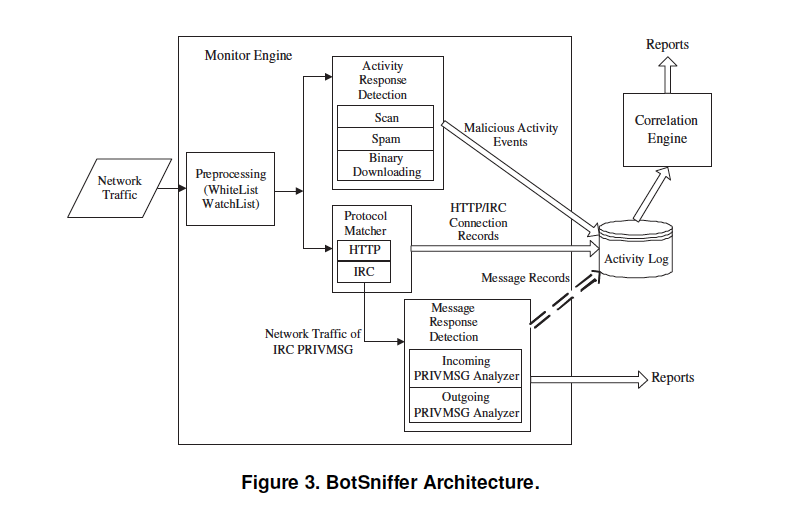

C&C流量很难检测的原因：

1. 使用与正常流量相同的协议
2. 流量很小
3. 在监控网络内，僵尸机器也很少
4. 流量还可能是加密的

僵尸网络的空间相关性和相似性，取决于预编程的响应活动，比如在一个相似的时间窗口，僵尸机器会执行相同的命令，然后将信息发送给C&C。正是这种特性，使得僵尸网络不同于其它正常用户所表现出的如此一致性的活动。以此，当我们观察到多个相关和相似的行为时，就可认为我们检测到僵尸网络的存在。

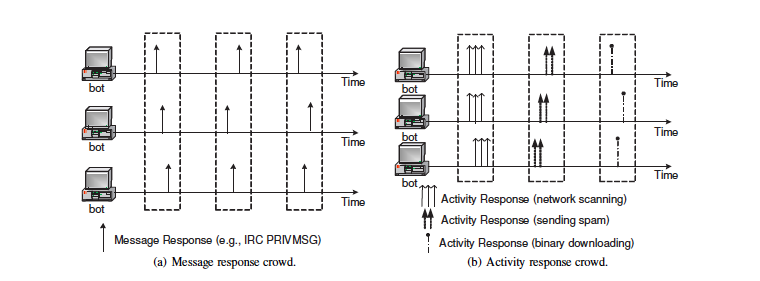

#### 监控引擎

**数据预处理**

* 该步不是必须，但是能够提高效率，减少计算量
* 过滤掉不太可能跟C&C相关的流量，如ICMP，UDP等
* 硬白名单过滤掉正常的服务器通讯，如谷歌，雅虎等
* 活动响应检测，可以创建一个监控列表只分析列表中的类C&C协议的主机

**类C&C协议匹配器**

* 基于端口无关的类C&C协议匹配，如IRC\HTTP协议
* IRC协议信息会包含，PASS NICK 和 USER
* HTTP协议一般有GET，POST，HEAD等

**活动/消息响应检测**

* 消息检测，使用IRC PRIVMSG消息进行进一步相关性分析
* 扫描活动检测，异常扫描率和权重失败连接率
* 垃圾邮件行为检测，集中在DNS MX查询和SMTP连接
* 二进制下载检测，可以使用鸡蛋检测方法

#### 关联引擎

任何活动/消息响应分析中有多个连接到同一IP/PORT的事件都会发出警告，通知可能的僵尸网络的存在。

对于单个聚集活动，一般来说，如果是僵尸网络活动的，它的聚集度要高于不是僵尸网络活动的；如果是多个聚集活动的话，那会更加增加这种检测效果。

对于需要多少数量的聚集活动，才能更好地判断其实僵尸网络活动，这边选择使用随机游走算法。

随机游走算法，用于对端口扫描和垃圾邮件清洗检测。

> 说明：随机漫步算法在P2P网络中的应用，随机发送K个查询到临近的K个节点，由发送节点确定是否需要再次进行这种随机发现。

以上这种算法思想是基于密度聚合来衡量的，这种方法在实际使用时，存在一定的问题。而进一步分析可知，活动/消息响应的信息一般都是具有同质性的，同质性相似分析，我们可以使用聚类算法来实现。我们在聚集的基础上使用聚类算法，聚类算法的类别是即是设定的阈值。如果聚类数目超过这个数，即判定为是僵尸网络活动。

相似度度量的方法有很多，如最小编辑距离，最长公共子序列，DICE系数等

对于只有单个僵尸机器的僵尸网络检测，不再使用具有同质性的出站响应信息作为考量的方法，我们使用从其它僵尸机器发送来的入站同质思路来考虑，如同我们在群里发送消息，其他人也都会收到。

#### DNS域名检测

从DNS流量中抽取15个特征用于描述不同域名的特征。

域名除了用于提供正常的网络服务，如HTTP，ftp等，但很多也被有不良企图的人所使用，比如用于网络钓鱼，垃圾邮件，恶意代码下载等。

对于hackers同样也面临着怎样部署一个可靠、安全、高效的基础架构僵尸网络，使得能够稳健地工作。

使用Fast-flux技术，将关键的C&C服务器隐藏到代理服务器后面。

能够快速地识别恶意域名，就能够减小由僵尸网络、钓鱼网址、恶意下载等引起的威胁。

被动域名检测具有隐藏性，不依赖于历史数据信息，如恶意域名信息等。

需要大量的数据集，优点是不需要先验知识，训练的数据是递归域名信息，输入模型的数据，包括查询的域名，查询的时间，应答信息的持续时间，如TTL，和要查询域名管理的IP地址列表

EXPOSURE的架构：

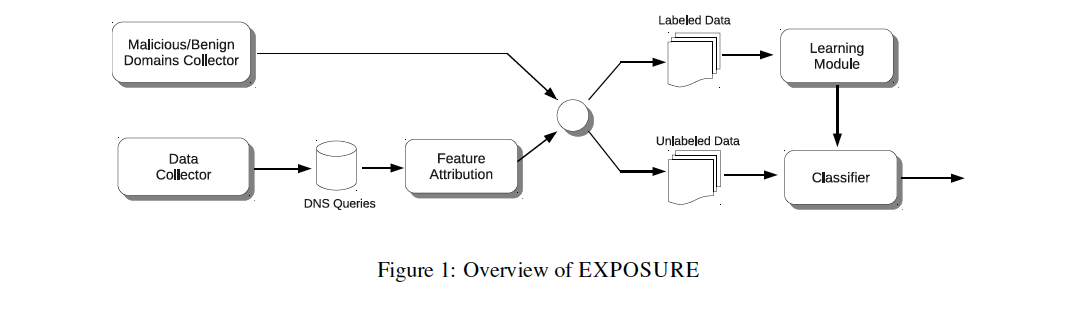

* 数据收集器：收集受监控的DNS流量
* 特征属性组件：抽取域名特征
* 良性/恶意域名收集器：独立组件，与数据收集器并行，良性域名数据集来自Alexa和WHOIS数据库；恶意域名数据信息来自如malwaredomains.com，Phishtank，Anubis。这部分收集的数据属于有标的数据，通过训练我们需要对从数据收集器过来的数据进行预测
* 学习组件：通过对有标数据的训练得到模型，再对无标数据进行预测
* 分类器组件：对无标数据进行预测

训练的方法可以根据需要进行调整，准确预测的数据，也可以再放进去，进行叠加训练。

特征集：

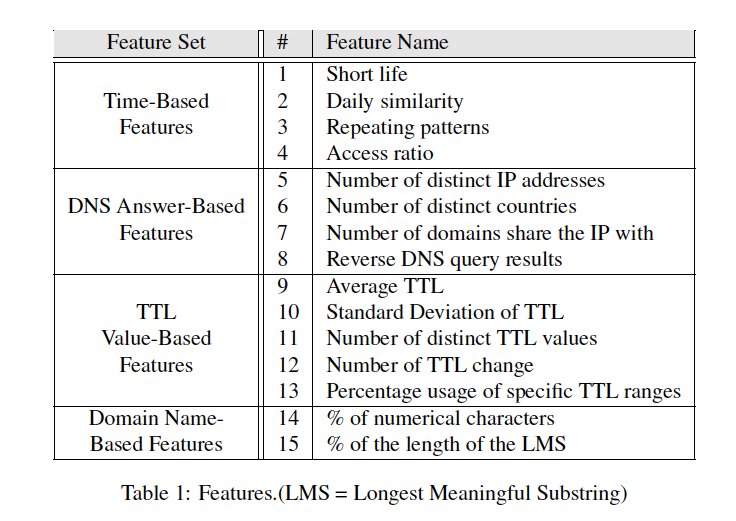

基于时间的特征：

* 对于正常的域名请求，时间这个特征或许是没有什么用的，但是如果是恶意域名，将会呈现出一些特征
* 一个观察信息，就是域名请求数会突然增加和减少，如果有很多的僵尸机器发起对某个DNS的请求，那很有可能是恶意域名，但也有可能是基于DNS查询的DDOS攻击
* 按固定时间段，统计这段时间内的查询次数，进而我们可以考虑到它是一种序列化的数据，按照时间顺序的查询次数
* 全局分析为整个监控周期，而本地分析为一个间隔时间的开始/结束时间；全局分析是为了检测域名的生命周期，而本地分析主要是为了检测域名的活动
* 短暂生命周期检测：一般的正常域名不会突然出现，然后伴随着一段时间的活动请求后，又突然消失，如果存在这种特性，就有可能是恶意域名
* 日相似度：以日为单位的每天的DNS查询次数
* 重复模式：一般的恶意域名的查询都会比较区域比较相似的模式
* 访问率：如果是正常域名，访问率一般不会很低，而是恶意域名很少会被访问到，可以通过每天的访问量来对比
* 短暂域名和重复模式可以用来检测突然改变

基于DNS回答的特征：

* 攻击者一般会将域名解析成多个IP，同时多个IPs也会在不同域名之间共享
* 一个给定域名被解析成不同IP地址的数量
* 这些IP在不同国家的数量
* 这些IP的反向域名解析的结果
* 解析到给定域名的共享IP的不同域的数量
* 虚拟主机提供商可能会使用共享域名（域名相同，不同端口）

基于TTL值的特征

* TTL值用于对应答的查询域名的缓存时间
* 一般DNS的TTL值在1~5天
* 但是为了高可用，一般会将该值设置小一点，比如CDN服务
* 这种将TTL设置的更小，和RRDNS也会被攻击者使用，使得其能够跳掉DNS信誉库的检查
* 平均TTL使用
* 一般频繁的TTL改变只会在恶意的复杂网络中出现
* 一般使用家庭网络被感染的主机的TTL值要小，而使用固定IP被感染的机器的TTL值要大
* TTL值改变次数
* 不同TTL值的总数
* 恶意域名使得TTL值则较为分散
* 指定TTL值的利用率，
* TTL值划定范围：[0, 1),
[1, 10), [10, 100), [100, 300), [300, 900), [900, inf)
* 恶意域名在[0, 100)之间较多

基于域名的特征

* 恶意域名一般都是由域名生成算法生成的，不具有可记忆性
* 域名数值部分的长度与域名长度的比率
* 最长有意义的子字符串的长度与域名长度的比率（正常域名为了便于记忆，都会用有意义的字符串）
* 一般都选择有二级域名的域名进行统计
* 恶意域名的可以同时参考其点击率

对僵尸网络的研究可分为：检测，追踪，测量，预测和对抗

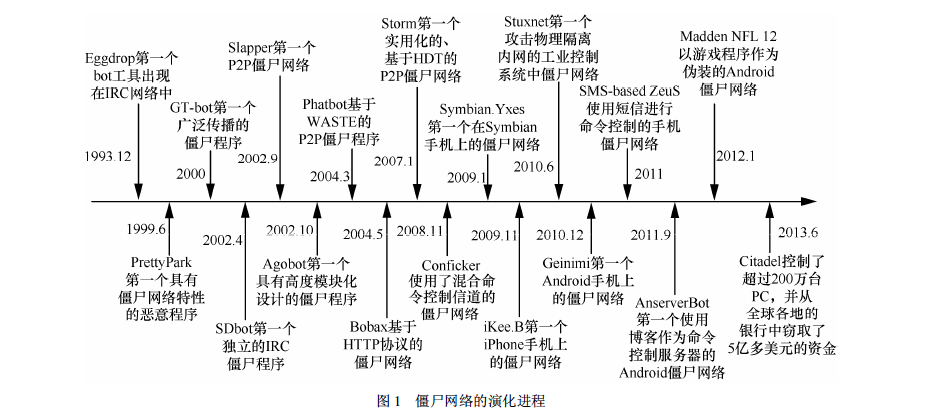

web服务器与人体免疫系统有很大的相似性，在进入异常状态时会在不同层面表现出异常。使用DCA用于web服务器的异常检测：首先分析web服务器运行时的特征，从不同层面采集服务器运行参数组成多层次指标体系，再对指标体系进行映射处理，抽象为算法各类信号，最后使用DCA进行web服务器的异常诊断。

DC群体中的每个树突状细胞参与收集组织中的抗原，同时收集以下三种环境信号：病原体相关分子模式PAMP、危险信号DS和安全信号SS。未成熟的DC把摄取的三种环境信号作为输入信号，经过权重矩阵及相关函数融合处理后，输出协同刺激分子CSM、半成熟信号semi和成熟信号mat，并对这三种输出信号分别进行累加，其中semi累加结果表示当前细胞环境的安全程度，mat累加结果表示当前细胞环境的危险程度。当CSM达到迁移阈值时，DC发生迁移，迁移时会比较semi和mat各自累加结果的大小，当前细胞迁移到浓度较大的状态。同时根据当前细胞环境，对该DC所有采集到的抗原进行标记，标记为semi或mat。当抗原达到判别次数后，计算代表该抗原异常程度的成熟环境抗原值MCAV（抗原被标记为成熟环境抗原次数/抗原被标记的总次数），比对MCAV与设定的判别阈值，如果大于阈值则表明该抗原为异常抗原，否则抗原为正常抗原。

DCA主要包括初始化阶段，更新阶段和综合评价阶段。

第一步：初始化阶段。初始化算法的输入参数，包括PAMP、危险信号、安全信号，DC的迁移阈值，权重矩阵，抗原序列向量等

第二步：更新阶段。DC随机采集抗原池中的信号和抗原，累计CSM、SEMI和MAT的输出值。当CSM的累计值超过细胞迁移阈值，比较成熟DC分泌的细胞因子与半成熟DC分泌的细胞因子的大小，决定DC的分化结果。

第三步：综合评价阶段。对DC采样的抗原进行分析，记录每个抗原被判别的次数和异常次数。通过计算MCAV的值来评价抗原的异常程度。

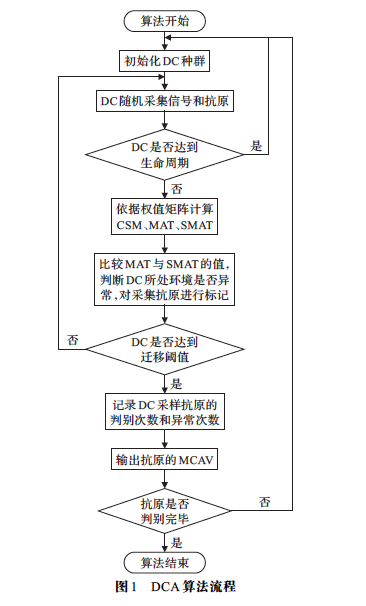

web服务器运行特征提取

采集的特征有：服务器CPU负载情况，内存使用情况，I/O速率，web请求服务端口占用情况，监听服务运行状态，请求数/响应数，请求响应成功率等。

当服务器出现异常不能正常响应用户请求时，上述指标中一个或多个会出现超出正常阈值的行为，可以反映服务器的异常状态。

主要的几个层面的指标：

操作系统层面：

* CPU利用率：根据一般运维规律，在服务器正常运行时，CPU占用率最高不能超过70%。如果出现利用率超过70%时，说明服务器危险程度偏高或者亚健康，此时存在异常隐患，较容易进入无法提供正常服务的异常状态
* 内存利用率：当服务器受到攻击或负载过重时，会产生大量系统请求，内存利用率会急剧升高
* web服务端口占用情况：当web服务端口被其它服务占用时，服务器无法响应web请求，表示服务器受到攻击，已经进入异常状态
* web服务监听状态：当web服务监听状态为无响应时，说明服务器已经无法响应请求，进入异常状态
* I/O速率：当服务器负载过重或受到攻击时，容易产生大量的读写磁盘操作，导致I/O速率会急速下降

web连接层面

* web连接的使用情况：当web连接出现超出定义最大长连接时，服务器端已无法自动终端长连接，说明服务器已出现异常
* 假死状态连接的比例：当服务器受到攻击而产生异常，web连接极易被占用并大量假死连接。此类连接占用系统资源，使服务器无法正常响应用户请求，从而进入异常状态，如DDOS攻击

请求响应层面

* 请求数/响应数：当服务器因受到攻击或负载过重时，单位时间内的请求数会急剧上升，请求响应比会增大，服务器容易出现异常
* 请求响应成功率：当服务器可以成功响应请求时，说明服务器运行正常；当服务器响应请求总是失败时，说明该服务器出现异常的概率较大
* 最近的请求在队列中等待时间：当服务器受到攻击或运行过载产生异常时，请求响应速度会降低，甚至会出现无法响应请求的情况，最近的请求在队列中等待时间会增大

无论选取多少指标，在经过下一步的PAMP，DS以及SS信号的映射之后，都会降维变成三个信号作为算法输入

PAMP，DS及SS信号的映射

* PAMP：病原体相关分子模式，表明系统处于非健康状态，存在异常行为的特征，不能正常响应用户的请求。根据web服务器运行时的特征及请求响应过程，将<font color='red'>web服务器口占用情况及web服务监听状态</font>抽象为PAMP信号
* DS：危险信号，说明系统存在异常的可能性较高。将web服务器的这种状态抽象为DS信号，由<font color='red'>CPU利用率、内存占用率、IO速率、Web连接使用情况、假死状态连接的比例、请求响应比、请求响应成功率及最近请求</font>等待时间8项指标组成。但需要考虑各指标之间的相互影响，例如当CPU占用率超过阈值很多且内存占用率也超出阈值时，最近请求的等待时间超过阈值的可能性就比较大
* SS：安全信号，表示正常的可能性较高，系统处于健康状态

抽象信号包括PAMP、危险信号(Danger Signal,DS)、安全信号(Safe Signal, SS)、发炎信号(Inflammation Signal, IS)、协同刺激分子(Co-Stimulatory Molecules, CSM)、半成熟信号(semi)和成熟信号(mat)

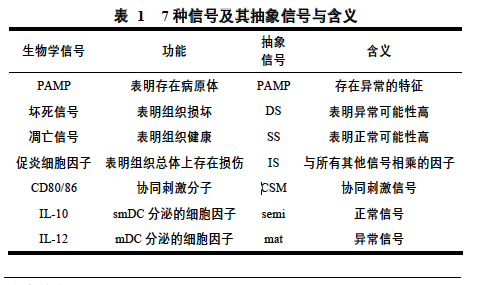

僵尸网络在网络流量中呈现出的时空相似性特征，如相似的通信周期性，分组大小，持续时间，数据分组时序，流量持续时间，报文到达时间间隔等，和访问域名，端口，IP等统计特征。空间上的相似性主要是用于单台僵尸程序的检测，而时间上的相似性主要体现在多台感染的机器，一般是结合两者提取相关特征。

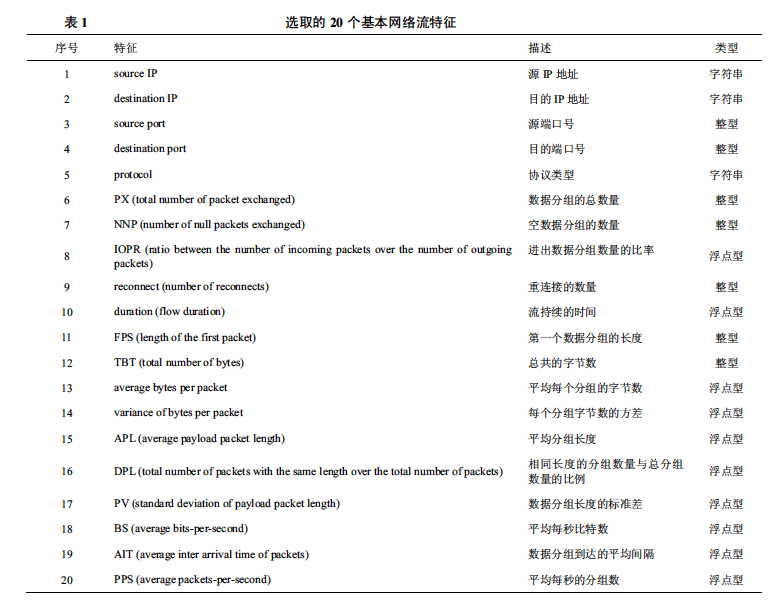


补充知识：

1.报文(message)
报文是网络中交换与传输的数据单元，也是网络传输的单元。报文包含了将要发送的完整的数据信息，其长短不需一致。报文在传输过程中会不断地封装成分组、包、帧来传输，封装的方式就是添加一些控制信息组成的首部，那些就是报文头。
 
2.分组(packet)
分组是在网络中传输的二进制格式的单元，为了提供通信性能和可靠性，每个用户发送的数据会被分成多个更小的部分。在每个部分的前面加上一些必要的控制信息组成的首部，有时也会加上尾部，就构成了一个分组。
 
3.数据包(data packet)
数据包是TCP/IP协议通信传输中的数据单元，也称为“包”。是指自包含的，带有足够寻址信息，可独立地从源主机传输到目的主机，而不需要依赖早期的源主机和目的主机之间交换信息以及传输网络的数据包。
 
4.数据报(datagram)
面向无连接的数据传输，其工作过程类似于报文交换。采用数据报方式传输时，被传输的分组称为数据报。
 
5.帧(frame)
帧是数据链路层的传输单元。它将上层传入的数据添加一个头部和尾部，组成了帧。

采集特定时间间隔内的流量数据（比如采集一天24小时的流量，按每小时统计基本特征，得到数值数据），并提取基本特征，并将各特征进行标准化处理。得到的标注化后的各特征向量，将其进一步转化为欧拉矩阵，具体的转化步骤如下：

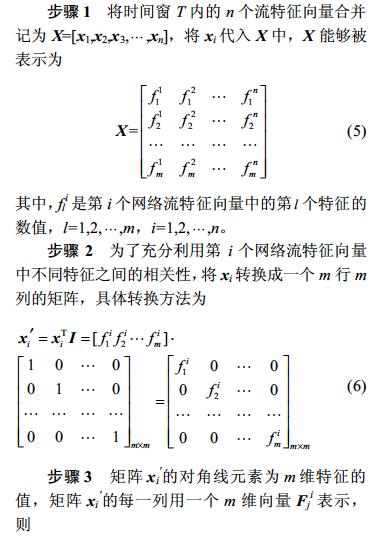
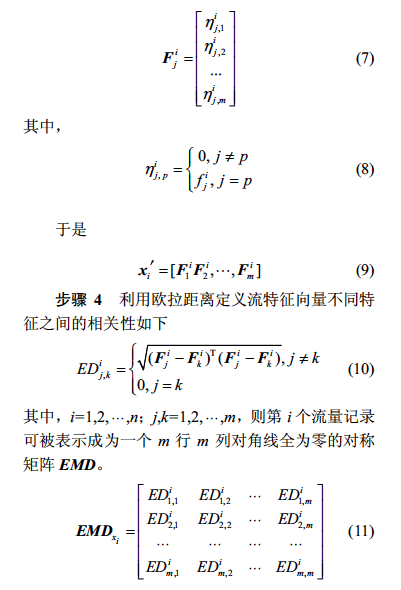

将欧拉矩阵中的每个元素看做像素点，矩阵中元素值代表像素的灰度，元素值越大，灰度越大，越接近白色；元素值越小，灰度越小，越接近黑色，由此可将每一个时间窗口内的网络流量特征向量集转换为一幅灰度图像。对于正常和异常网络流，利用欧拉距离转换后的EMD是存在明显差异的，故而可用其进行异常检测。

这边提取的主要是欧式距离利用各特征之间存在相关性度量作为其灰度图的亮度值。

检测指标：

一是检测的准确度，包括检测率、误报率和漏报率，而是检测速度，包括离线训练时间和测试时间。

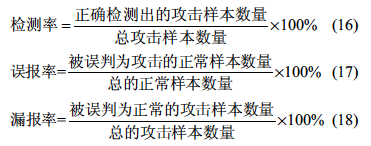

对于随机域名的检测分类：

* 基于域名分布相似度的检测方法
    * 统计正常域名和随机域名的n-gram分布（基于字符级别的n-gram，一般n取1，2）
    * 使用相对熵、jacard距离与编辑距离进行响度衡量（相对熵，即KL散度，用于衡量两分布之间的距离，jacard距离是用于衡量两集合间的相似度的，编辑距离也是用于文本内容相似度的统计，一般可以用于论文查重功能）
    * 对每一个IP地址或权威域名计算其所对应域名的n-gram分布分别与正常域名N-gram分布和随机域名n-gram分布的相似度
    * 根据相似度大小判断当前IP地址或权威域名是否遭受随机域名攻击
    * 对于单一域名由于字符数优先，字符分布不具有统计特性，基于分布相似度的方法难以做出类别判断
* 基于机器学习的检测方法
    * 提取bi-gram特征，使用svm/决策树训练
    * 根据dns查询日志将域名与主机的集合构成图模型，使用置信传播算法进行声望推断，据此进行随机域名检测
    * 域名由于很短，字符个数也就26个英文字母，或汉语拼音，可以使用One-hot编码，而如果是对于词汇的编码，可以使用countvec
    
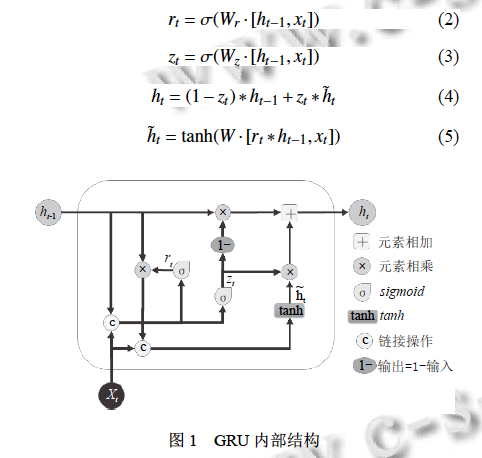
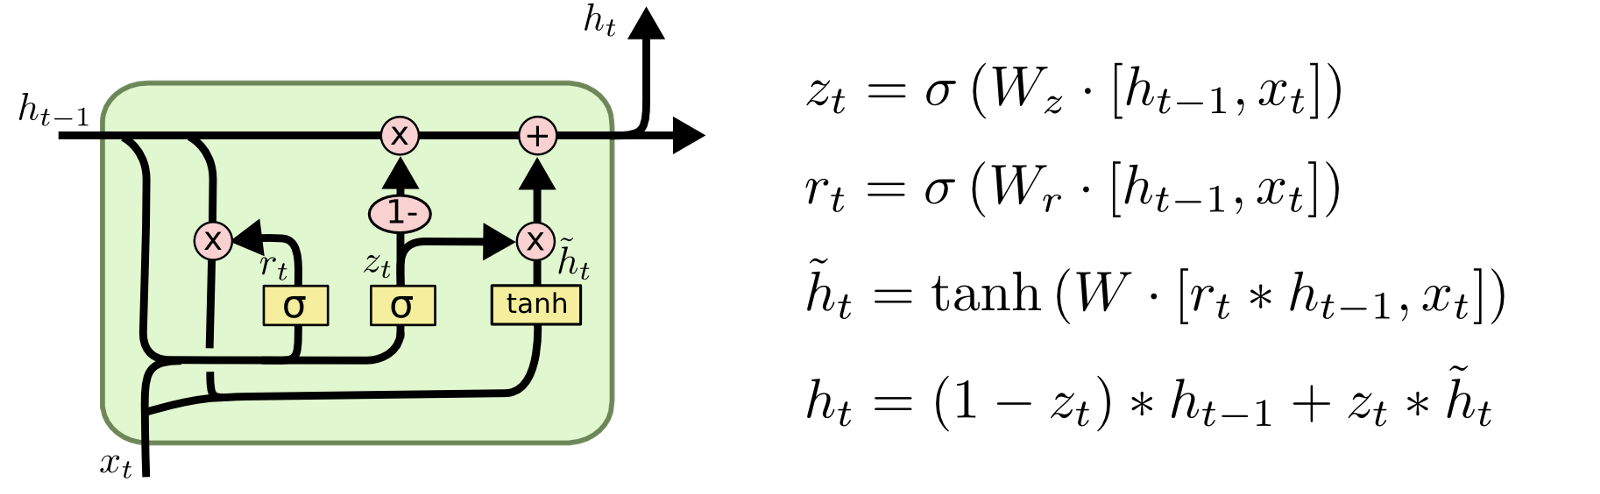
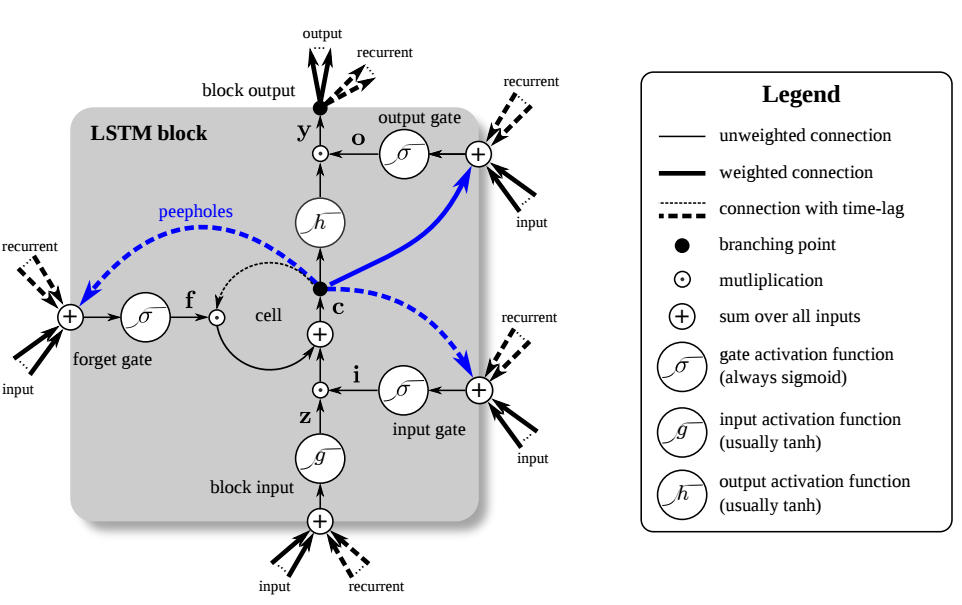
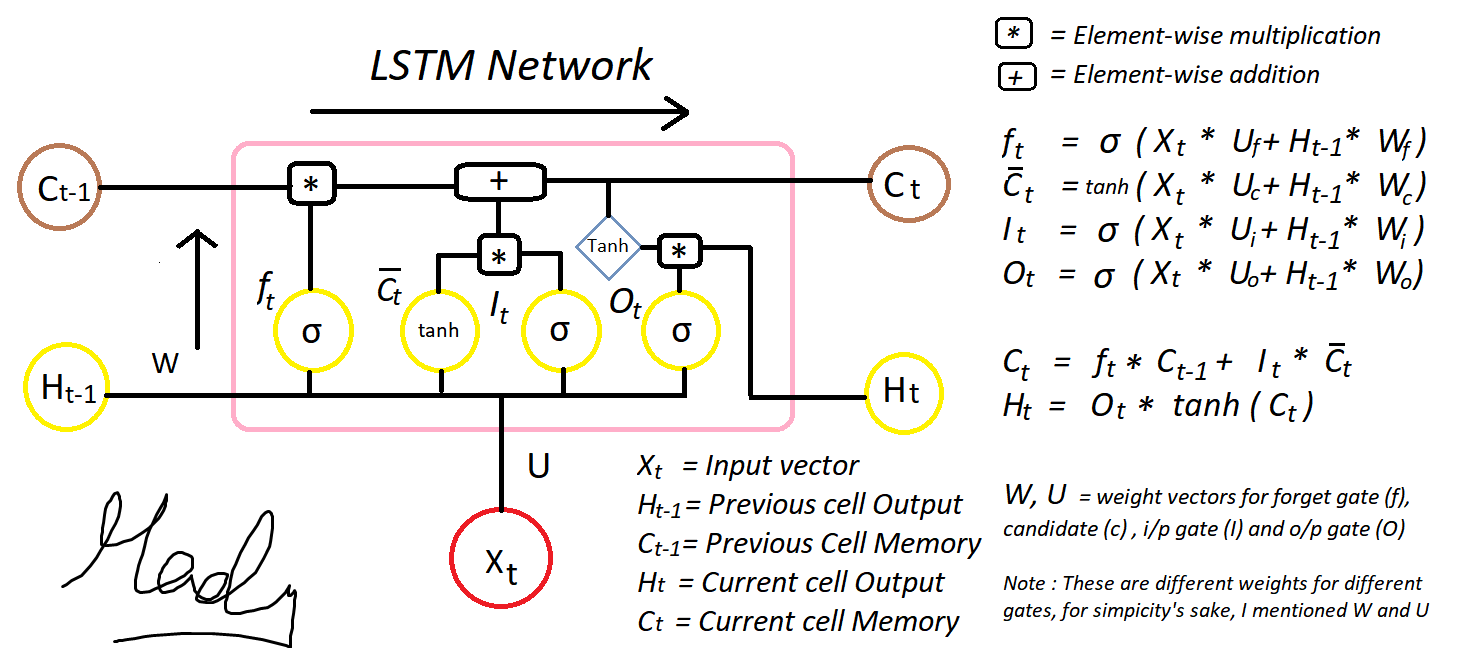
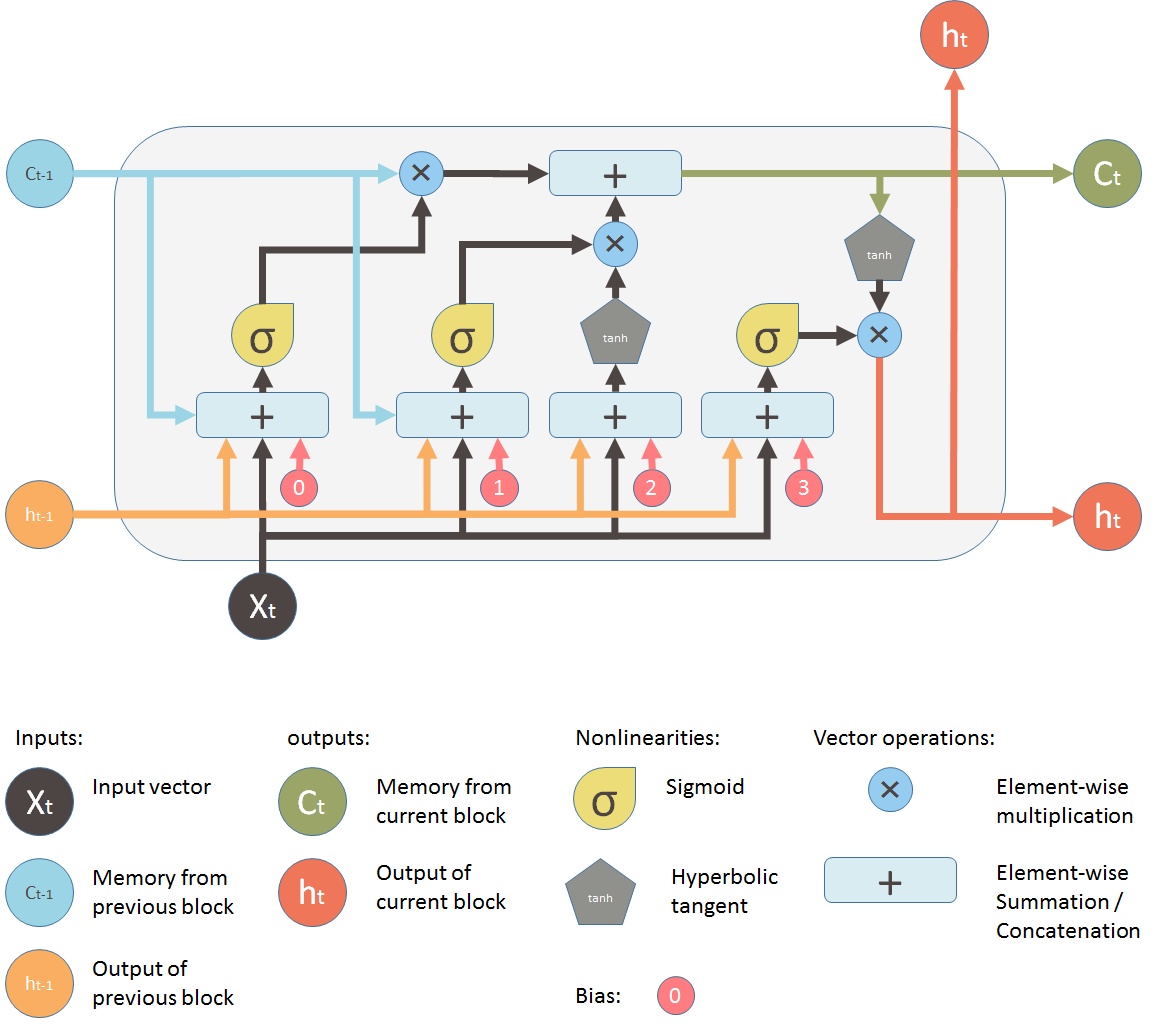
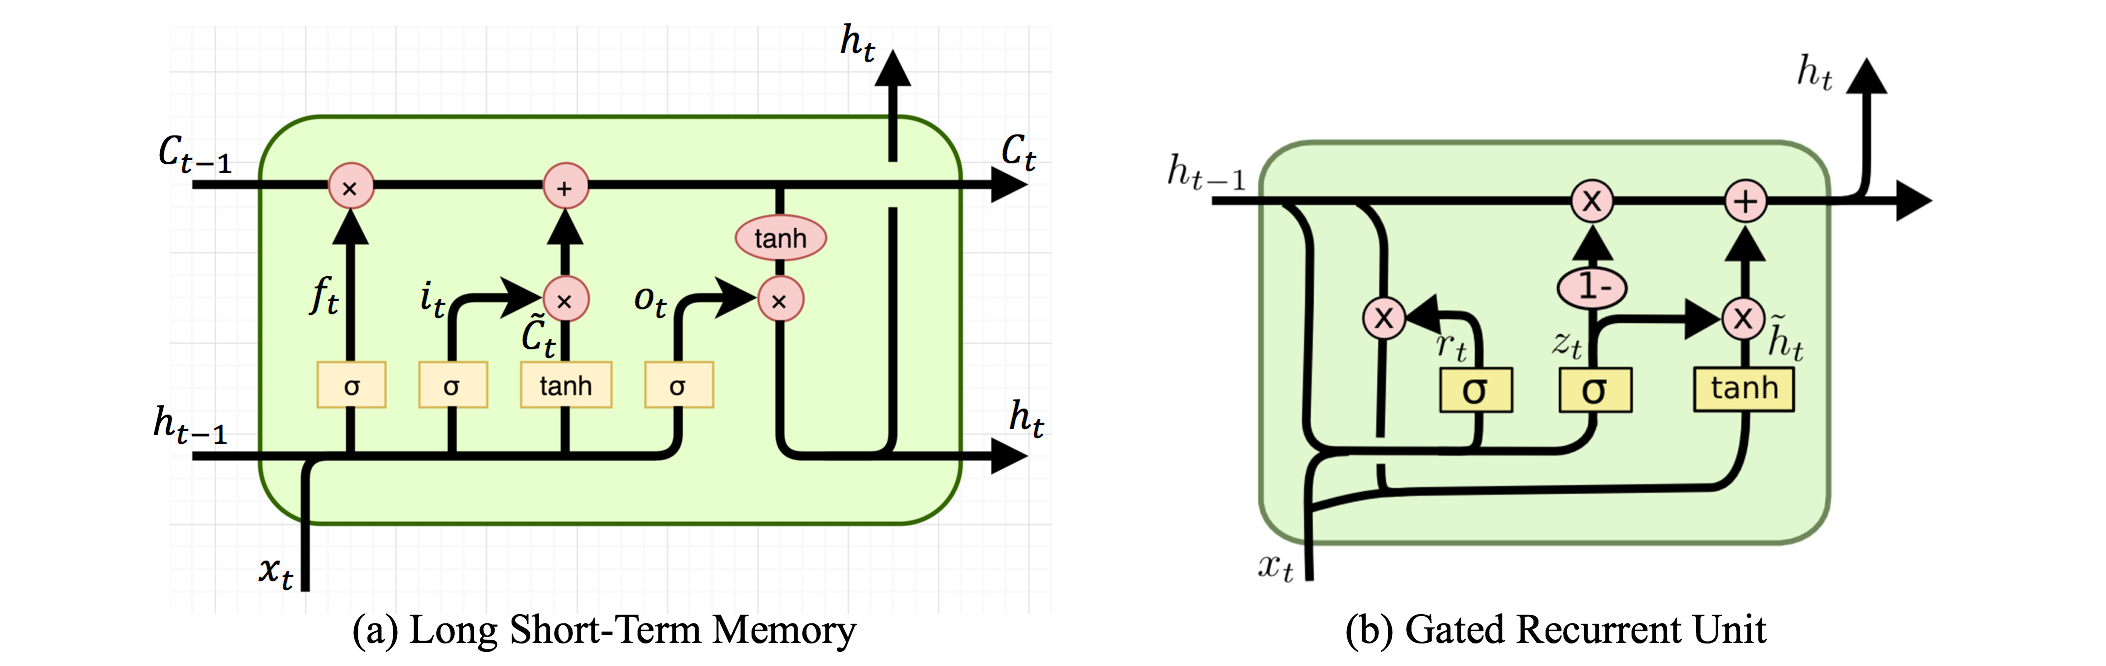

僵尸网络的攻击手段：

* 恶意软件分发
* 勒索软件分发
* 垃圾邮件分发
* 分布式拒绝服务
* 钓鱼攻击
* 用户身份窃取
* 点击欺诈
* 电子货币挖掘

针对P2P僵尸网络，根据其通信协议又可分为结构化和非结构化。结构化僵尸网络通常采用基于分布式哈希表的P2P协议，如Strom僵尸网络使用基于Kademlia算法的Overnet协议。这些P2P僵尸网络的固有脆弱点时易受索引污染攻击和女巫攻击，易于通过Crawler和Sybil节点测量其规模。非结构化僵尸网络通畅采用随机扫描方式或者节点列表方式进行通信。基于随机扫描方式的僵尸网络存在流量异常的固有脆弱点; 采用基于Peer-list 交换方式进行通信, 每个僵尸主机需要维护一份包含节点信息的列表, 即Peer-list, 并定期随机挑选其中的部分节点进行通信, 获取攻击者指令和更新节点信息, 这类P2P 僵尸网络具有较好的灵活性、可扩展性、健壮性, 在许多流行的P2P 僵尸网络中使用, 如Kelihos, Waledac, ZeroAccess。。然而, 基于Peer-list 交换的僵尸网络容易受到污染攻击。防御者可以部署大量污染节点长期活跃地在僵尸网络中, 频繁地与正常节点交换Peer-list。因为污染节点的各种行为表现如同正常节点(激进的防御者甚至可允许污染节点参与真正的攻击), 所以难以区分。当污染节点占据了正常节点Peer-list 的绝大部分位置后(即污染了正常节点的Peer-list), 全部污染节点在同一时刻停止运行, 就可以达到破坏僵尸网络的目的。知名僵尸网络Waledac正是因其协议设计存在漏洞而被微软协同学术机构通过Peer-list 污染进行关闭。

P2P网络易受攻击的形式：包括Bootstrap 攻击、Index Poisoning 攻击、Sybil 攻击、Peer-list Pollution 攻击